In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D

from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import json
from datetime import datetime

%matplotlib inline

import os

In [2]:
print("TensorFlow", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)

TensorFlow 2.20.0


In [3]:
#завантажуємо дані
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#попередня обробка
X_train = X_train.reshape(X_train.shape[0], 28 * 28) / 255
X_test = X_test.reshape(X_test.shape[0], 28 * 28) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
def plot_model(history=None, model_version='v1'):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['accuracy'], label='Точність на тренуванні', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Точність на валідації', color='green', marker='x', linewidth=2)
    plt.plot(history.history['loss'], label='Втрати на тренуванні', color='red', linestyle='--', linewidth=2)
    plt.plot(history.history['val_loss'], label='Втрати на валідації', color='orange', linestyle='--', marker='x', linewidth=2)
    plt.title(f'Модель {model_version} – точність та втрати', fontsize=16)
    plt.xlabel('Епохи', fontsize=12)
    plt.ylabel('Значення точності / втрат', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Нейронна мережа за допомогою механізмів Keras

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

FashionMNIST_v8 = Sequential(name='v8')
FashionMNIST_v8.add(Input(shape=(784,), name='v8_input'))

FashionMNIST_v8.add(Dense(256, activation='relu', name='v8_hidden1'))
FashionMNIST_v8.add(Dropout(0.4, name='v8_dropout1'))

FashionMNIST_v8.add(Dense(128, activation='relu', name='v8_hidden2'))

FashionMNIST_v8.add(Dense(10, activation='softmax', name='v8_output'))

FashionMNIST_v8.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v8.summary()

Model: "v8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v8_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_dropout1 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_hidden2 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
%%time
history_FashionMNIST_v8 = FashionMNIST_v8.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7876 - loss: 0.5925 - val_accuracy: 0.8479 - val_loss: 0.4165
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8453 - loss: 0.4281 - val_accuracy: 0.8552 - val_loss: 0.3985
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8551 - loss: 0.3932 - val_accuracy: 0.8680 - val_loss: 0.3541
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8626 - loss: 0.3732 - val_accuracy: 0.8777 - val_loss: 0.3363
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8692 - loss: 0.3567 - val_accuracy: 0.8753 - val_loss: 0.3391
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3436 - val_accuracy: 0.8772 - val_loss: 0.3339
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3290 - val_accuracy: 0.8837 - val_loss: 0.3193
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.3211 - 

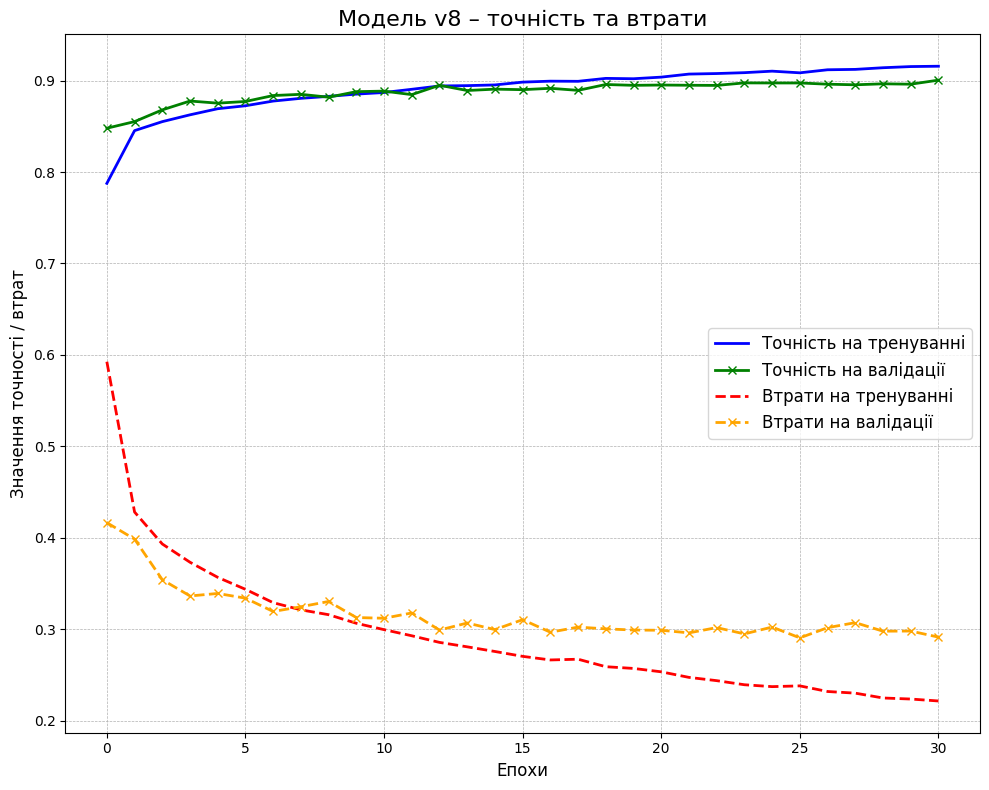

In [9]:
plot_model(history=history_FashionMNIST_v8, model_version='v8')

In [10]:
# оцінка моделі
test_loss, test_acc = FashionMNIST_v8.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_acc} Test loss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8923 - loss: 0.3167

Test accuracy: 0.892300009727478 Test loss: 0.3166511356830597


### Висновки: точність тестових даних близько 0.8923, а тренувальних понад 0.91

# Згорткова мережа

In [11]:
# завантаження і попередня обробка набору даних
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# додати вимірювання каналів
x_train = X_train[..., tf.newaxis]
x_test = X_test[..., tf.newaxis]

In [12]:
FashionMNIST_conv2d_v1 = Sequential(name='conv2d_v1')

FashionMNIST_conv2d_v1.add(Input(shape=(28, 28, 1), name='input_layer'))
FashionMNIST_conv2d_v1.add(Conv2D(32, (3, 3), activation='relu', name='conv2d_layer1'))
FashionMNIST_conv2d_v1.add(MaxPooling2D((2, 2), name='maxpool_layer1'))
FashionMNIST_conv2d_v1.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_layer2'))
FashionMNIST_conv2d_v1.add(MaxPooling2D((2, 2), name='maxpool_layer2'))
FashionMNIST_conv2d_v1.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_layer3'))
FashionMNIST_conv2d_v1.add(Flatten(name='flatten_layer'))
FashionMNIST_conv2d_v1.add(Dense(64, activation='relu', name='dense_layer1'))
FashionMNIST_conv2d_v1.add(Dense(10, activation='softmax', name='output_layer'))

FashionMNIST_conv2d_v1.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

FashionMNIST_conv2d_v1.summary()

Model: "conv2d_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_layer1 (Conv2D)               │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer1 (MaxPooling2D)        │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer2 (Conv2D)               │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer2 (MaxPooling2D)        │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_layer3 (Conv2D)               │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer1 (Dense)                 │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
%%time
history_FashionMNIST_conv2d_v1=FashionMNIST_conv2d_v1.fit(
    X_train, 
    y_train, 
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
) 

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7478 - loss: 0.7073 - val_accuracy: 0.8062 - val_loss: 0.5195 - learning_rate: 5.0000e-04
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8429 - loss: 0.4331 - val_accuracy: 0.8563 - val_loss: 0.4011 - learning_rate: 5.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8681 - loss: 0.3690 - val_accuracy: 0.8658 - val_loss: 0.3801 - learning_rate: 5.0000e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8806 - loss: 0.3322 - val_accuracy: 0.8781 - val_loss: 0.3403 - learning_rate: 5.0000e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8892 - loss: 0.3059 - val_accuracy: 0.8823 - val_loss: 0.3368 - learning_rate: 5.0000e-04
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8970 - loss: 0.2869 - val_accuracy: 0.8914 - val_loss: 0.3061 - learning_rate: 5.0000e-04
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - acc

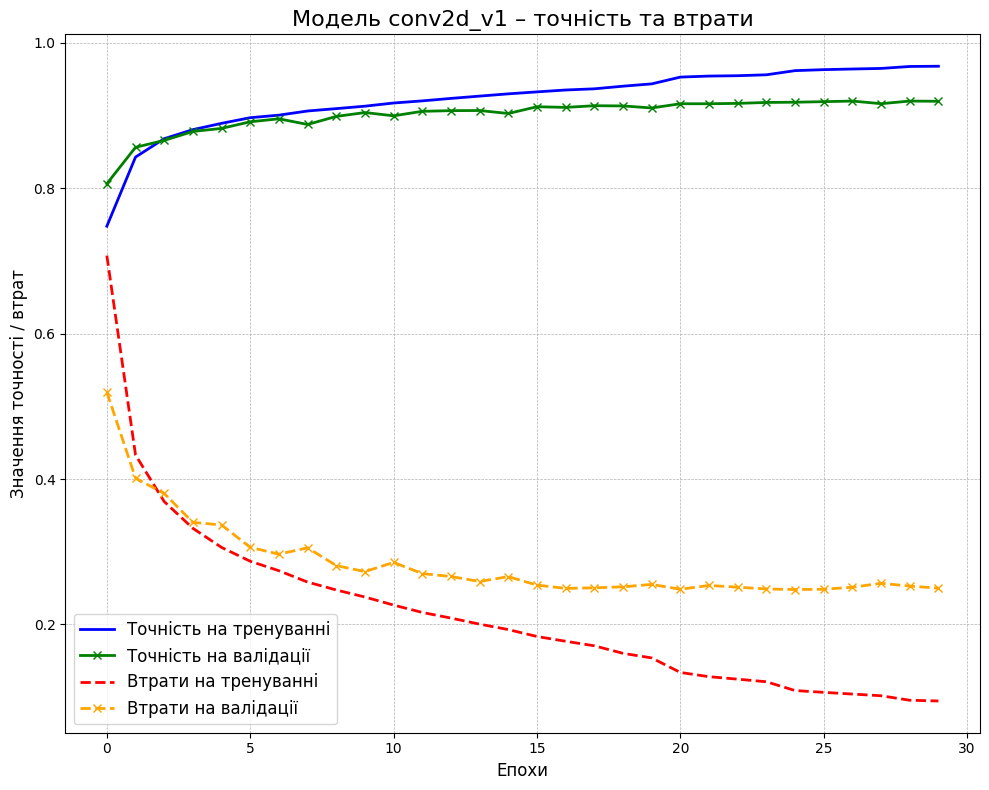

In [14]:
plot_model(history=history_FashionMNIST_conv2d_v1, model_version='conv2d_v1')

In [15]:
test_loss, test_acc = FashionMNIST_conv2d_v1.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc} Test loss: {test_loss}')

313/313 - 1s - 2ms/step - accuracy: 0.9183 - loss: 0.2480

Test accuracy: 0.9182999730110168 Test loss: 0.2479914277791977


## Висновки: точність тестових даних близько 0.9182, а тренувальних понад 0.96, час навчання 3 хв. 35 с.

In [16]:
FashionMNIST_conv2d_v2 = models.Sequential(name='conv2d_v2')
FashionMNIST_conv2d_v2.add(layers.Input(shape=(28, 28, 1), name='input_layer'))
FashionMNIST_conv2d_v2.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer1'))
FashionMNIST_conv2d_v2.add(layers.BatchNormalization(name='batchnorm_layer1'))
FashionMNIST_conv2d_v2.add(layers.MaxPooling2D((2, 2), name='maxpool_layer1'))
FashionMNIST_conv2d_v2.add(layers.Dropout(0.3, name='dropout_layer1'))
FashionMNIST_conv2d_v2.add(layers.Dropout(0.3, name='dropout_layer3'))
FashionMNIST_conv2d_v2.add(layers.Flatten(name='flatten_layer'))
FashionMNIST_conv2d_v2.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), name='dense_layer1'))
FashionMNIST_conv2d_v2.add(layers.BatchNormalization(name='batchnorm_dense1'))
FashionMNIST_conv2d_v2.add(layers.Dropout(0.5, name='dropout_dense1'))
FashionMNIST_conv2d_v2.add(layers.Dense(10, activation='softmax', name='output_layer'))

FashionMNIST_conv2d_v2.compile(optimizer=Adam(learning_rate=0.0005),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

FashionMNIST_conv2d_v2.compile(optimizer=Adam(learning_rate=0.0005),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

FashionMNIST_conv2d_v2.summary()

Model: "conv2d_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_layer1 (Conv2D)               │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_layer1                     │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_layer1 (MaxPooling2D)        │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer1 (Dropout)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer3 (Dropout)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer1 (Dense)                 │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_dense1                     │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_dense1 (Dropout)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,602 (2.65 MB)

 Trainable params: 694,282 (2.65 MB)

 Non-trainable params: 320 (1.25 KB)

In [17]:
%%time
history_FashionMNIST_conv2d_v2=FashionMNIST_conv2d_v2.fit(
    X_train, 
    y_train, 
    batch_size=128,
    epochs=75,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8115 - loss: 0.7823 - val_accuracy: 0.8111 - val_loss: 0.8138 - learning_rate: 5.0000e-04
Epoch 2/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8632 - loss: 0.5813 - val_accuracy: 0.8849 - val_loss: 0.4903 - learning_rate: 5.0000e-04
Epoch 3/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8749 - loss: 0.5121 - val_accuracy: 0.8881 - val_loss: 0.4505 - learning_rate: 5.0000e-04
Epoch 4/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8821 - loss: 0.4692 - val_accuracy: 0.8944 - val_loss: 0.4180 - learning_rate: 5.0000e-04
Epoch 5/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.8860 - loss: 0.4459 - val_accuracy: 0.8964 - val_loss: 0.4085 - learning_rate: 5.0000e-04
Epoch 6/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8895 - loss: 0.4328 - val_accuracy: 0.8981 - val_loss: 0.4011 - learning_rate: 5.0000e-04
Epoch 7/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/ste

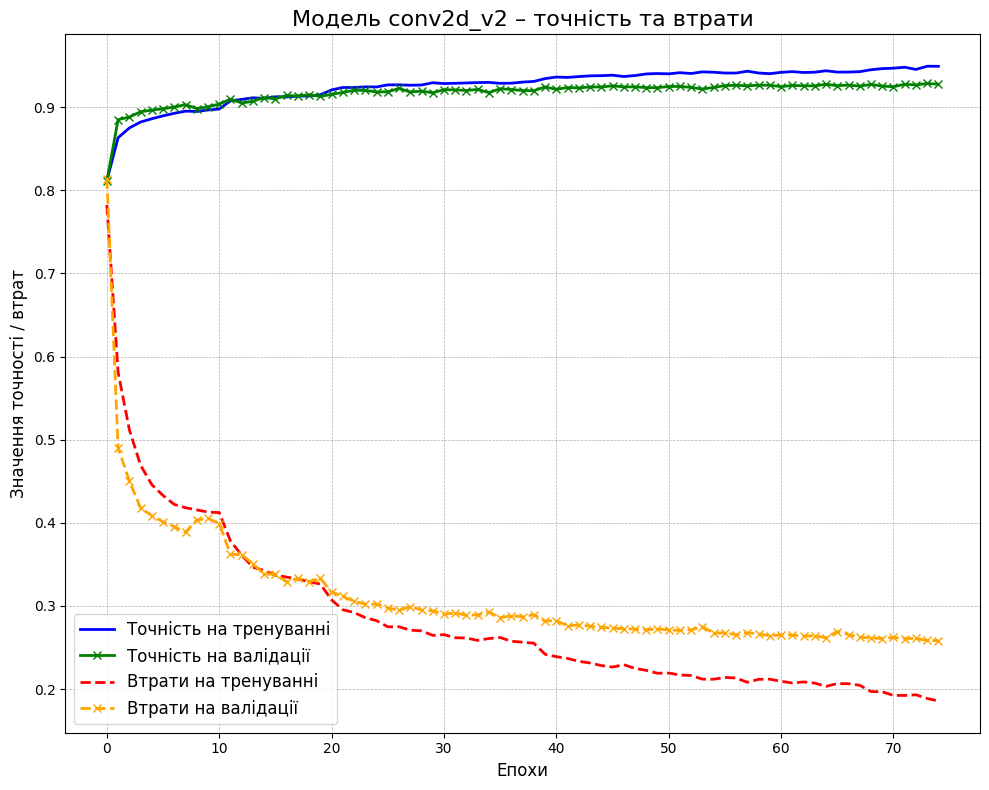

In [18]:
plot_model(history=history_FashionMNIST_conv2d_v2, model_version='conv2d_v2')

In [19]:
test_loss, test_acc = FashionMNIST_conv2d_v2.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc} Test loss: {test_loss}')

313/313 - 1s - 3ms/step - accuracy: 0.9275 - loss: 0.2582

Test accuracy: 0.9275000095367432 Test loss: 0.2581876516342163


### Висновки : час навчання став повільнішим для conv2d_v2 - 19 хв.50 с. на відміну від conv2d_v1 - 3 хв. 35 с.; 
### conv2d_v2 має точність тестових даних близько 0.9275, що на 0.0093 більше ніж conv2d_v1. 
### Хоча точність conv2d_v2 більша ніж conv2d_v1, але час тренування займає більше часу.

## Завдання 2 - VGG16 

In [20]:
FashionMNIST_vgg16 = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = tf.image.resize(X_train[..., tf.newaxis], [32, 32])
X_test = tf.image.resize(X_test[..., tf.newaxis], [32, 32])

X_train = tf.image.grayscale_to_rgb(X_train)
X_test = tf.image.grayscale_to_rgb(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
base_model = VGG16(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  

FashionMNIST_vgg16 = Sequential(name='vgg16_net_v2')
FashionMNIST_vgg16.add(base_model)
FashionMNIST_vgg16.add(GlobalAveragePooling2D(name='gap_layer'))  
FashionMNIST_vgg16.add(Dense(256, activation='relu', name='dense_layer1'))
FashionMNIST_vgg16.add(BatchNormalization(name='batchnorm_layer1'))
FashionMNIST_vgg16.add(Dropout(0.25, name='dropout_layer1'))
FashionMNIST_vgg16.add(Dense(10, activation='softmax', name='output_layer'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('vgg16_fashion_mnist.keras', save_best_only=True, monitor='val_loss')

initial_learning_rate = 0.001
FashionMNIST_vgg16.compile(
    optimizer=Adam(learning_rate=initial_learning_rate),
                   loss='categorical_crossentropy',
                   metrics=['accuracy']
)

In [22]:
%%time
history_FashionMNIST_vgg16 = FashionMNIST_vgg16.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 165s 351ms/step - accuracy: 0.8030 - loss: 0.5589 - val_accuracy: 0.8341 - val_loss: 0.4590 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 335ms/step - accuracy: 0.8452 - loss: 0.4268 - val_accuracy: 0.8427 - val_loss: 0.4249 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 332ms/step - accuracy: 0.8549 - loss: 0.3964 - val_accuracy: 0.8514 - val_loss: 0.4089 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 331ms/step - accuracy: 0.8586 - loss: 0.3842 - val_accuracy: 0.8541 - val_loss: 0.4016 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 335ms/step - accuracy: 0.8625 - loss: 0.3731 - val_accuracy: 0.8542 - val_loss: 0.4110 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 338ms/step - accuracy: 0.8638 - loss: 0.3702 - val_accuracy: 0.8569 - val_loss: 0.3939 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 330ms/step - accura

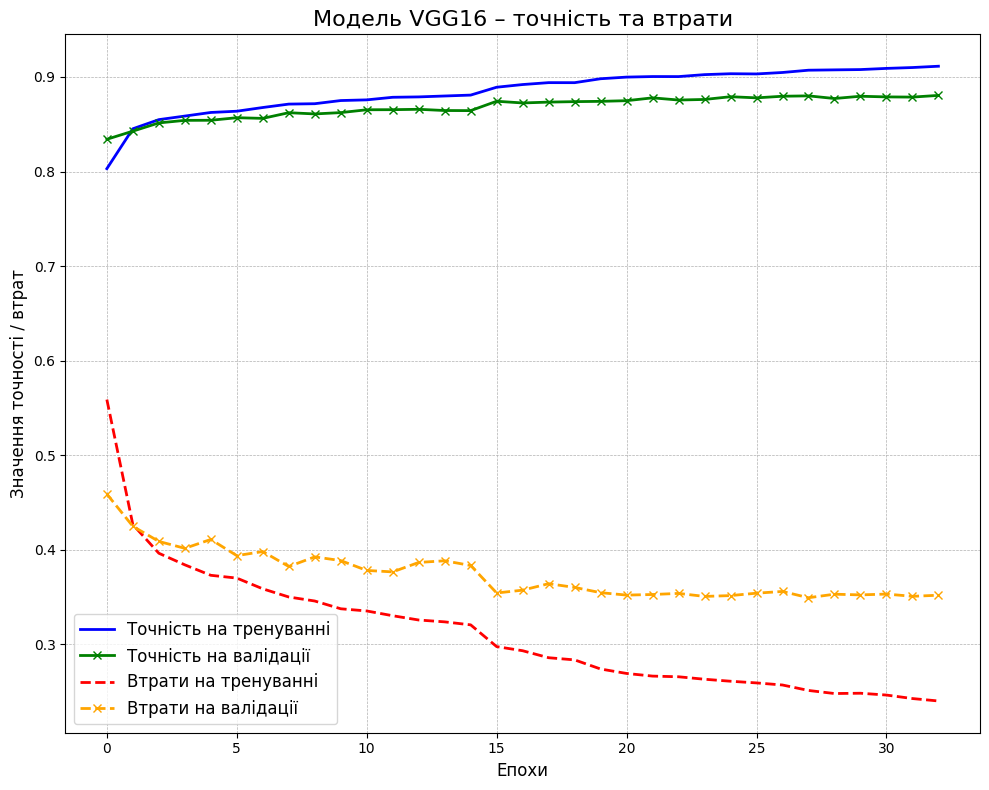

In [23]:
plot_model(history_FashionMNIST_vgg16, model_version='VGG16')

In [24]:
test_loss, test_acc = FashionMNIST_vgg16.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc} Test loss: {test_loss}')

313/313 - 26s - 84ms/step - accuracy: 0.8800 - loss: 0.3494

Test accuracy: 0.8799999952316284 Test loss: 0.34939953684806824


In [25]:
FashionMNIST_vgg16 = tf.keras.models.load_model('vgg16_fashion_mnist.keras')

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen.fit(X_train)

for layer in base_model.layers[-8:]:
    layer.trainable = True

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

fine_tune_learning_rate = 1e-5
FashionMNIST_vgg16.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate),
                                          loss='categorical_crossentropy',
                                          metrics=['accuracy'])


In [26]:
%%time
history_FashionMNIST_vgg16_tuning = FashionMNIST_vgg16.fit(X_train, y_train, batch_size=128,
                                                           epochs=50,
                                                           validation_data=(X_test, y_test),
                                                           callbacks=[early_stopping, reduce_lr])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 329ms/step - accuracy: 0.9082 - loss: 0.2460 - val_accuracy: 0.8814 - val_loss: 0.3493 - learning_rate: 1.0000e-05
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 339ms/step - accuracy: 0.9100 - loss: 0.2437 - val_accuracy: 0.8815 - val_loss: 0.3492 - learning_rate: 1.0000e-05
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 337ms/step - accuracy: 0.9096 - loss: 0.2427 - val_accuracy: 0.8811 - val_loss: 0.3495 - learning_rate: 1.0000e-05
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 336ms/step - accuracy: 0.9096 - loss: 0.2434 - val_accuracy: 0.8818 - val_loss: 0.3495 - learning_rate: 1.0000e-05
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 334ms/step - accuracy: 0.9094 - loss: 0.2432 - val_accuracy: 0.8808 - val_loss: 0.3495 - learning_rate: 1.0000e-05
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 335ms/step - accuracy: 0.9108 - loss: 0.2425 - val_accuracy: 0.8817 - val_loss: 0.3496 - learning_rate: 5.0000e-06
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 

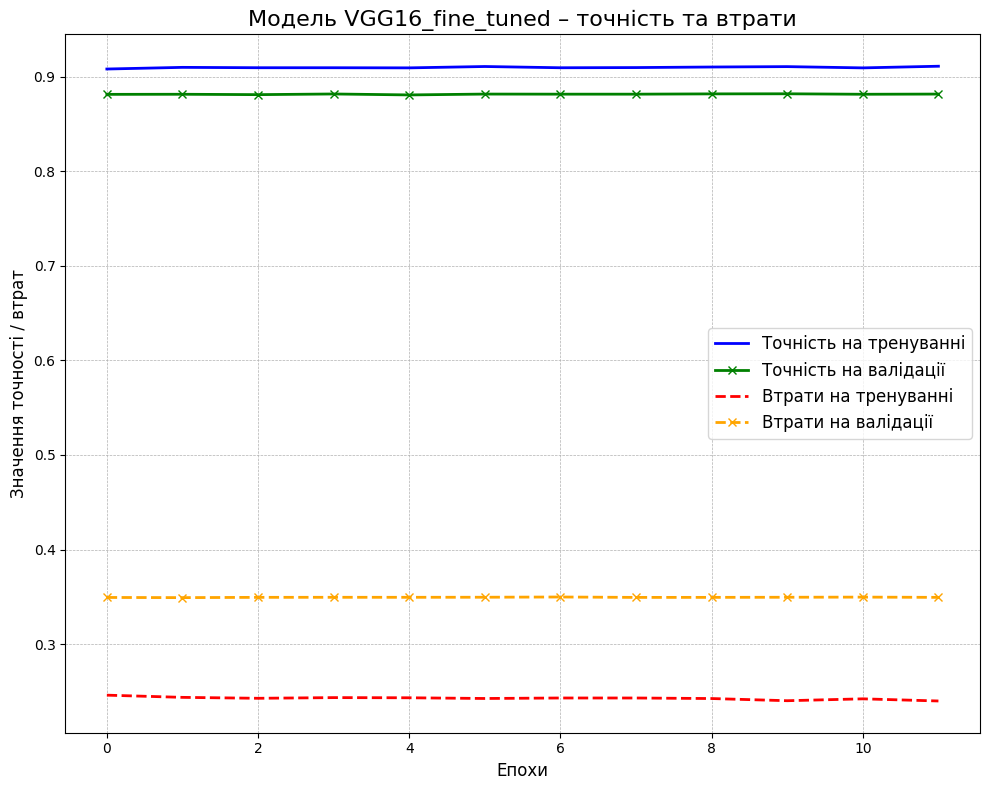

In [27]:
plot_model(history_FashionMNIST_vgg16_tuning, model_version='VGG16_fine_tuned')

In [28]:
test_loss, test_acc = FashionMNIST_vgg16.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc} Test loss: {test_loss}')

313/313 - 24s - 78ms/step - accuracy: 0.8815 - loss: 0.3492

Test accuracy: 0.8815000057220459 Test loss: 0.3491610586643219


In [29]:
# Збереження моделей
print("Збереження моделей...")

FashionMNIST_v8.save('fashion_mnist_v8.keras')
print("Модель v8 збережена")

FashionMNIST_conv2d_v1.save('fashion_mnist_conv2d_v1.keras')
print("Модель conv2d_v1 збережена")

FashionMNIST_conv2d_v2.save('fashion_mnist_conv2d_v2.keras')
print("Модель conv2d_v2 збережена")

FashionMNIST_vgg16.save('fashion_mnist_vgg16.keras')
print("Модель VGG16 збережена")

# Збереження історій навчання
import json

def save_history(history, filename):
    hist_dict = {
        'accuracy': [float(x) for x in history.history['accuracy']],
        'val_accuracy': [float(x) for x in history.history['val_accuracy']],
        'loss': [float(x) for x in history.history['loss']],
        'val_loss': [float(x) for x in history.history['val_loss']]
    }
    with open(filename, 'w') as f:
        json.dump(hist_dict, f)
    print(f"Історія збережена: {filename}")

save_history(history_FashionMNIST_v8, 'history_v8.json')
save_history(history_FashionMNIST_conv2d_v1, 'history_conv2d_v1.json')
save_history(history_FashionMNIST_conv2d_v2, 'history_conv2d_v2.json')
save_history(history_FashionMNIST_vgg16, 'history_vgg16.json')

print("\n Всі моделі та історії успішно збережені!")

Збереження моделей...
✓ Модель v8 збережена
✓ Модель conv2d_v1 збережена
✓ Модель conv2d_v2 збережена
✓ Модель VGG16 збережена
✓ Історія збережена: history_v8.json
✓ Історія збережена: history_conv2d_v1.json
✓ Історія збережена: history_conv2d_v2.json
✓ Історія збережена: history_vgg16.json

✅ Всі моделі та історії успішно збережені!


In [30]:
required_files = [
    'fashion_mnist_v8.keras',
    'fashion_mnist_conv2d_v1.keras',
    'fashion_mnist_conv2d_v2.keras',
    'fashion_mnist_vgg16.keras',
    'history_v8.json',
    'history_conv2d_v1.json',
    'history_conv2d_v2.json',
    'history_vgg16.json'
]

print("Перевірка файлів:")
for file in required_files:
    exists = "✓" if os.path.exists(file) else "✗"
    print(f"{exists} {file}")

Перевірка файлів:
✓ fashion_mnist_v8.keras
✓ fashion_mnist_conv2d_v1.keras
✓ fashion_mnist_conv2d_v2.keras
✓ fashion_mnist_vgg16.keras
✓ history_v8.json
✓ history_conv2d_v1.json
✓ history_conv2d_v2.json
✓ history_vgg16.json


## Висновки: vgg16 має точність 0.8799999952316284 , меншу ніж conv2d_v2 - 0.9275.  
## Також vgg16 потребує значно більшого часу навчання, особливо коли CPU. 
## Тому тут важливо використовувати GPU. 
## VGG16 — одна з найпопулярніших архітектур згорткових нейронних мереж, яка проста і надійна.
